In [33]:
#importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading all files

In [34]:
train_time_df= pd.read_csv("time_domain_features_train.csv")
train_frequency_df = pd.read_csv("frequency_domain_features_train.csv")
train_heart_rate_df = pd.read_csv("heart_rate_non_linear_features_train.csv")

test_time_df= pd.read_csv("time_domain_features_test.csv")
test_frequency_df = pd.read_csv("frequency_domain_features_test.csv")
test_heart_rate_df = pd.read_csv("heart_rate_non_linear_features_test.csv")

In [35]:
train_time_df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')

In [36]:
train_frequency_df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')

In [37]:
test_heart_rate_df.columns

Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'], dtype='object')

In [38]:
train_heart_rate_df.columns

Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'], dtype='object')

# Merging all 3 files into one df at UUID level

In [39]:
train_df1 = pd.concat([train_time_df, train_frequency_df], axis=1)
train_df = pd.concat([train_df1, train_heart_rate_df], axis=1)


test_df1 = pd.concat([test_time_df, test_frequency_df], axis=1)
test_df = pd.concat([test_df1, test_heart_rate_df], axis=1)

In [40]:
train_df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'uuid', 'VLF', 'VLF_PCT', 'LF',
       'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF',
       'uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

In [41]:
RR_fields=['HR',
 'MEAN_RR',
 'MEDIAN_RR',
 'SDRR',
 'RMSSD',
 'SDSD',
 'SDRR_RMSSD',
 'pNN25',
 'pNN50',
 'KURT',
 'SKEW']

REL_RR_fields=['MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR']
F_fields=['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF']

SD_fields = [ 'SD1', 'SD2', 'sampen', 'higuci','HR']


# To find any missing values and impute or drop

In [42]:
train_df.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
uuid                 0
uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
uuid                 0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [43]:
train_df.isna().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
uuid                 0
uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
uuid                 0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [44]:
train_df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.0
mean,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,0.523235,...,1.615576,4.433282,3185.356025,115.977200,0.048506,10.593708,154.178997,2.062471,1.182292,2.0
std,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,1.790348,...,1.761073,4.123365,1923.227187,360.855129,0.049238,2.914795,109.170222,0.206999,0.062192,0.0
min,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894820,...,0.002150,0.012825,377.692795,2.319952,0.000128,3.911344,38.307745,0.434576,1.033984,2.0
25%,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,-0.352783,...,0.346803,1.228054,1828.147788,14.737458,0.012433,8.368340,90.326864,2.032977,1.139929,2.0
50%,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,0.040736,...,1.039513,3.356860,2796.856587,28.789747,0.034735,10.196621,116.221063,2.134214,1.174293,2.0
75%,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,0.722833,...,2.245115,6.354266,4052.260157,80.429614,0.067854,12.679005,166.764850,2.181929,1.223621,2.0
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,...,13.095664,30.120917,13390.684098,7796.443096,0.431043,18.836107,796.852945,2.234841,1.361219,2.0


# Function to draw plots

In [45]:
def draw_plots(in_df,in_list,in_target):
    
    w = 18
    h = round(len(in_list)/3)*3
    
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    in_df[in_list].hist(bins=20, figsize=(w,h), color='#056F27')
    plt.show()

    f, axes = plt.subplots(round(len(in_list)/3),3,figsize=(w,h), sharex=False)
    # Scatter plot with Heart Rate
    for i,j in enumerate(in_list):
        sns.scatterplot(ax=axes[i//3,i%3],data=in_df, x=j, y=in_target)


    plt.subplots(figsize=(len(in_list),len(in_list)))
    sns.heatmap(in_df[in_list].corr(),annot=True)

    

# RR Fields

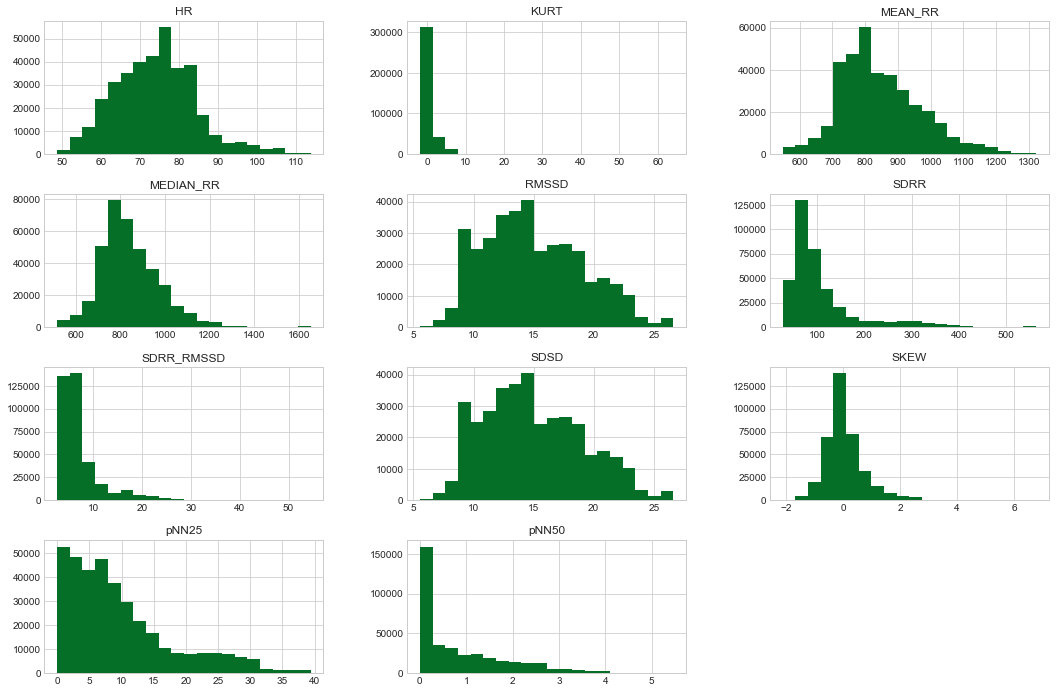

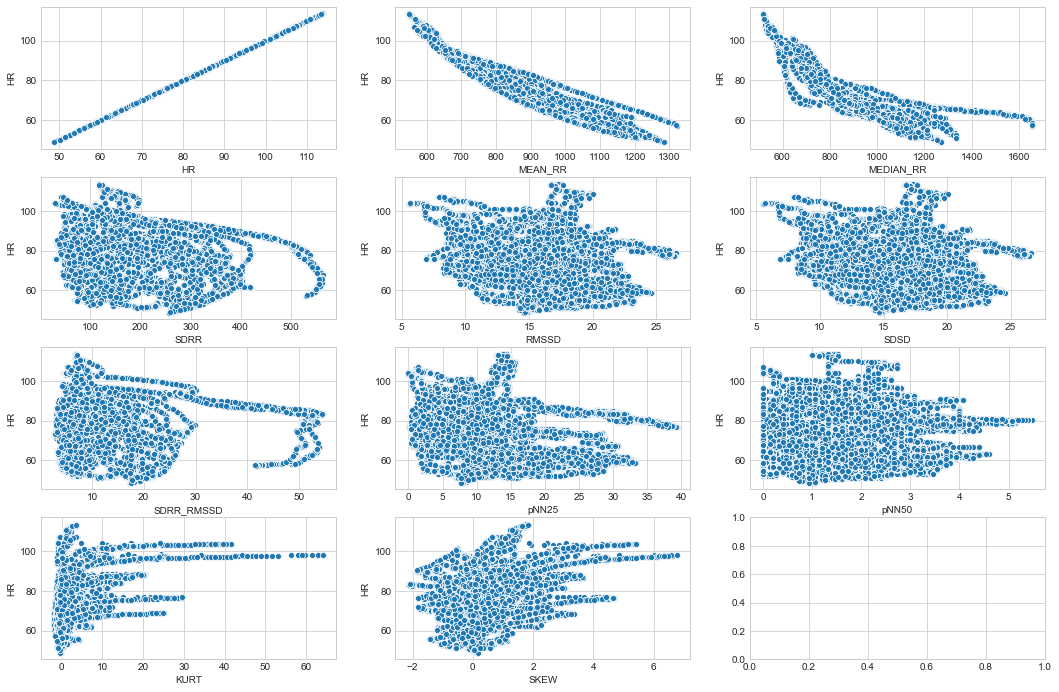

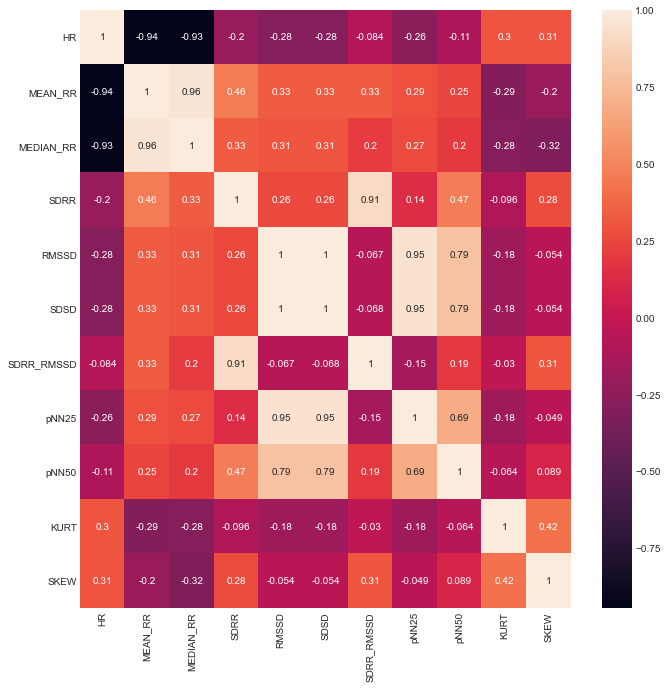

In [16]:
draw_plots(train_df,RR_fields,'HR')

# REL RR FIELDS

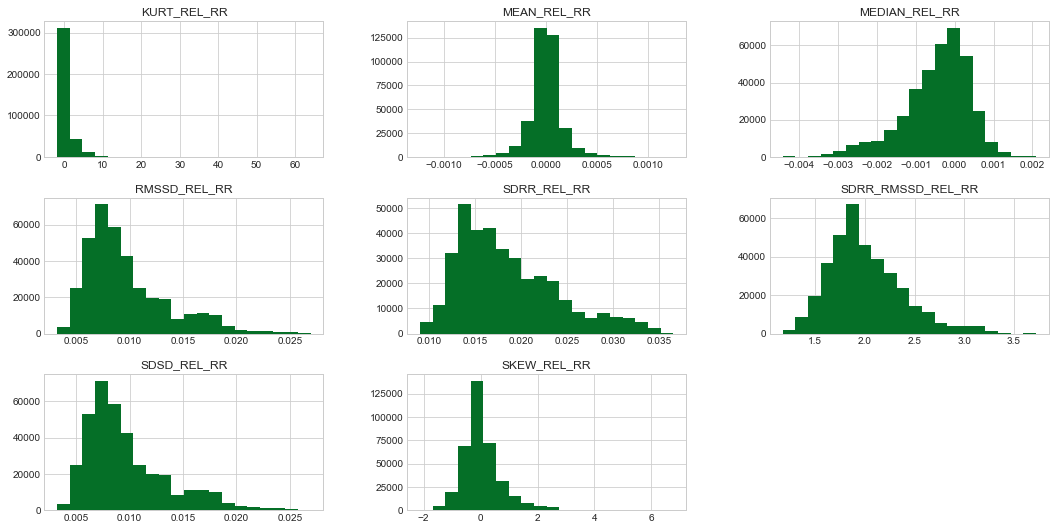

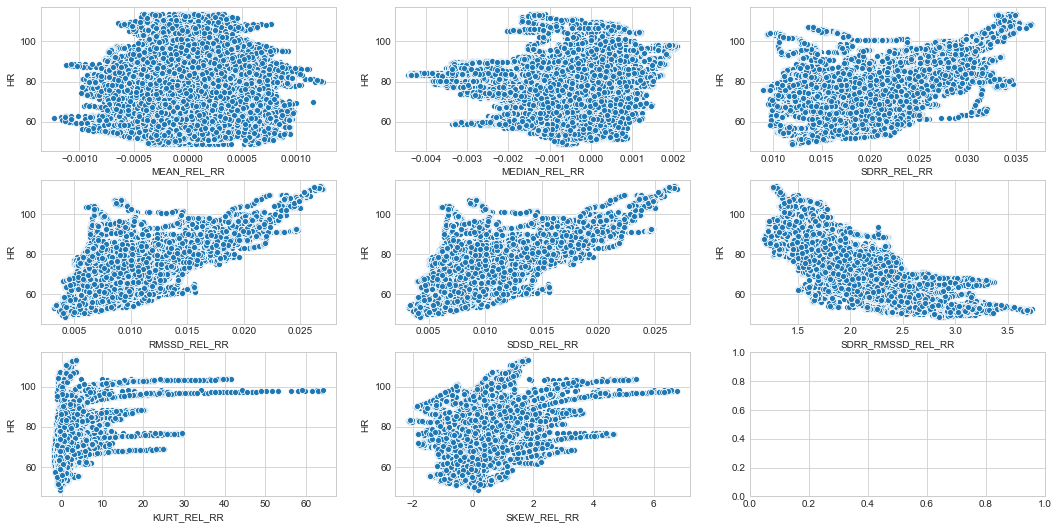

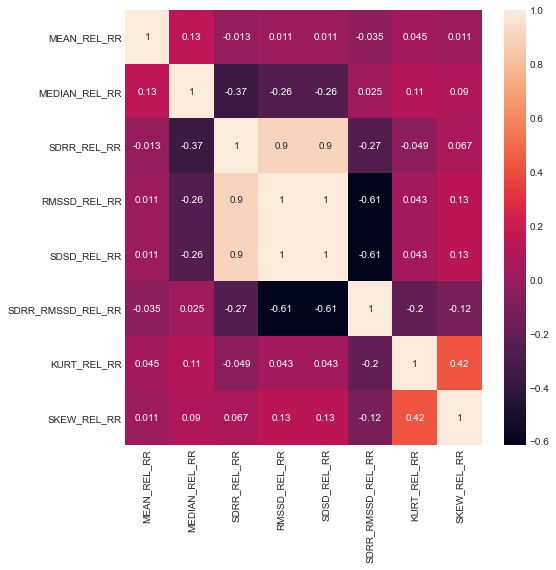

In [17]:
draw_plots(train_df,REL_RR_fields,'HR')

# F Fields

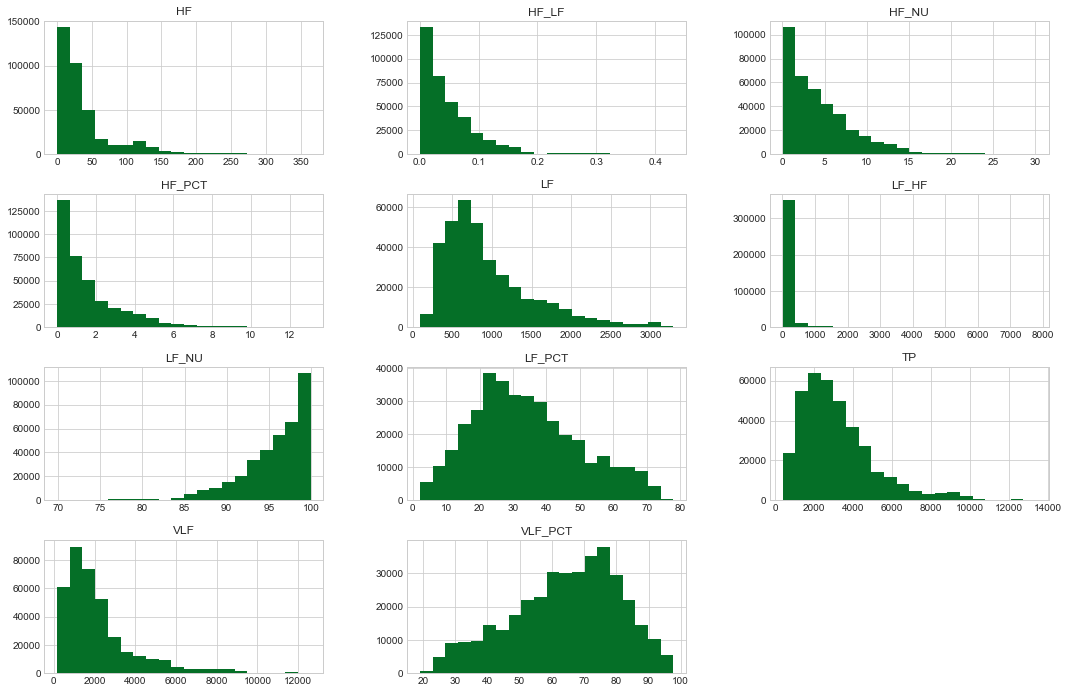

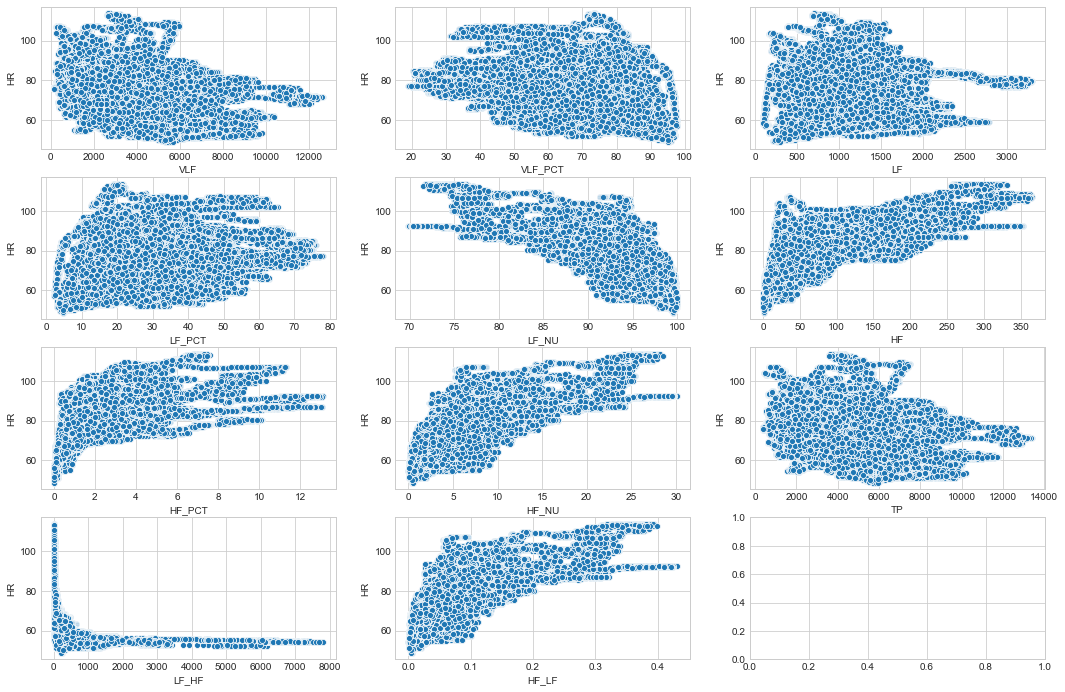

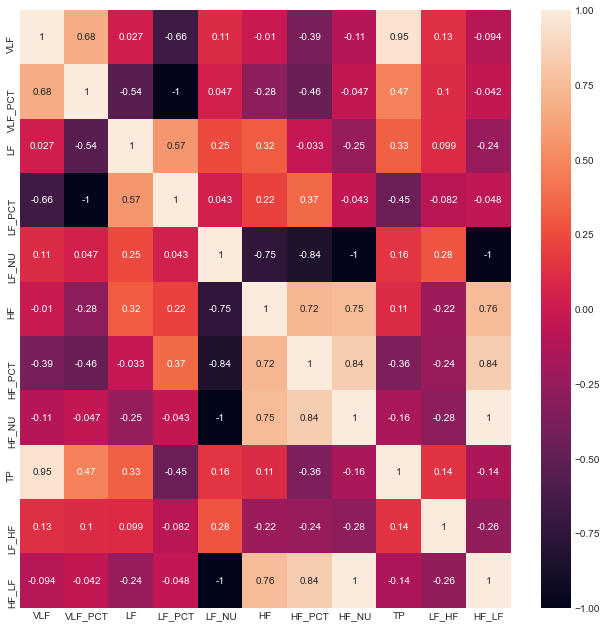

In [18]:
draw_plots(train_df,F_fields,'HR')

# SD Fields

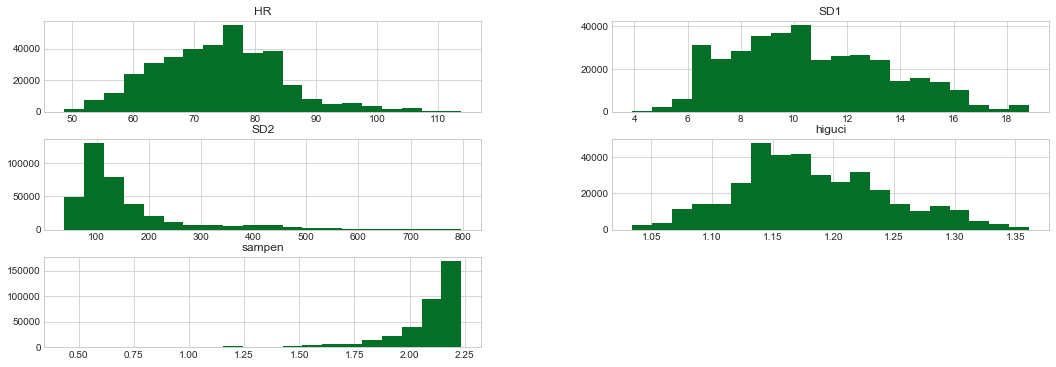

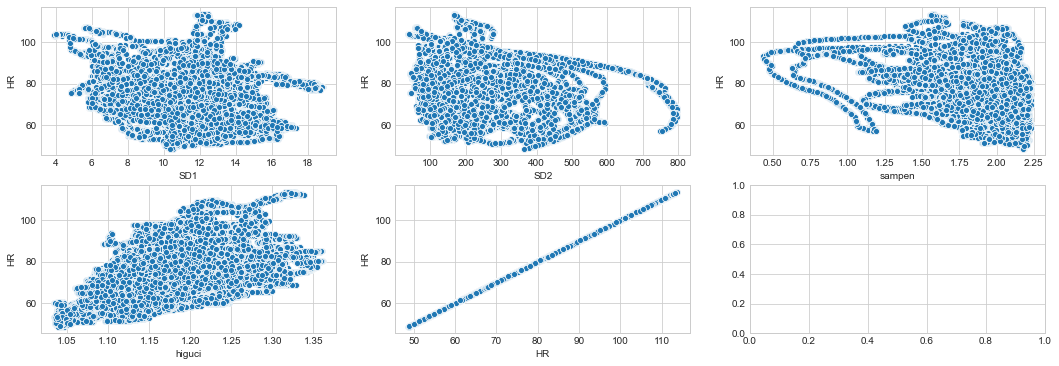

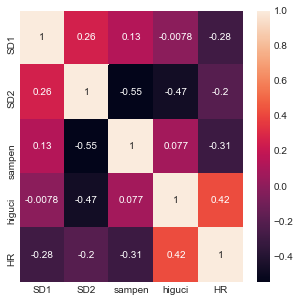

In [19]:
draw_plots(train_df,SD_fields,'HR')

# Identifying features to drop

In [61]:
train_df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen',
       'higuci', 'condition_no stress', 'condition_time pressure'],
      dtype='object')

In [62]:
to_drop_colinear = ['MEAN_RR','SDRR','RMSSD','RMSSD_REL_RR','SDRR_REL_RR','TP']

In [63]:
to_drop_colinear_old = ['MEAN_RR','SDRR_RMSSD','RMSSD_REL_RR','SDSD_REL_RR','KURT_REL_RR','SKEW_REL_RR','HF', 'HF_PCT', 'HF_NU', 'TP']

In [64]:
to_drop_weak_predictors = ['MEAN_REL_RR','MEDIAN_REL_RR']

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MEAN_RR                  369289 non-null  float64
 1   MEDIAN_RR                369289 non-null  float64
 2   SDRR                     369289 non-null  float64
 3   RMSSD                    369289 non-null  float64
 4   SDSD                     369289 non-null  float64
 5   SDRR_RMSSD               369289 non-null  float64
 6   HR                       369289 non-null  float64
 7   pNN25                    369289 non-null  float64
 8   pNN50                    369289 non-null  float64
 9   KURT                     369289 non-null  float64
 10  SKEW                     369289 non-null  float64
 11  MEAN_REL_RR              369289 non-null  float64
 12  MEDIAN_REL_RR            369289 non-null  float64
 13  SDRR_REL_RR              369289 non-null  float64
 14  RMSS

In [66]:
# to remove UUID column
train_df.drop('uuid', axis=1,inplace = True)
# to remove dataset_id column
train_df.drop('datasetId', axis=1,inplace = True)

KeyError: "['uuid'] not found in axis"

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MEAN_RR                  369289 non-null  float64
 1   MEDIAN_RR                369289 non-null  float64
 2   SDRR                     369289 non-null  float64
 3   RMSSD                    369289 non-null  float64
 4   SDSD                     369289 non-null  float64
 5   SDRR_RMSSD               369289 non-null  float64
 6   HR                       369289 non-null  float64
 7   pNN25                    369289 non-null  float64
 8   pNN50                    369289 non-null  float64
 9   KURT                     369289 non-null  float64
 10  SKEW                     369289 non-null  float64
 11  MEAN_REL_RR              369289 non-null  float64
 12  MEDIAN_REL_RR            369289 non-null  float64
 13  SDRR_REL_RR              369289 non-null  float64
 14  RMSS

In [68]:
train_df.groupby('condition')['condition'].count()

KeyError: 'condition'

In [69]:
train_df=pd.get_dummies(train_df, drop_first=True) # creating dummy values and dropping on

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MEAN_RR                  369289 non-null  float64
 1   MEDIAN_RR                369289 non-null  float64
 2   SDRR                     369289 non-null  float64
 3   RMSSD                    369289 non-null  float64
 4   SDSD                     369289 non-null  float64
 5   SDRR_RMSSD               369289 non-null  float64
 6   HR                       369289 non-null  float64
 7   pNN25                    369289 non-null  float64
 8   pNN50                    369289 non-null  float64
 9   KURT                     369289 non-null  float64
 10  SKEW                     369289 non-null  float64
 11  MEAN_REL_RR              369289 non-null  float64
 12  MEDIAN_REL_RR            369289 non-null  float64
 13  SDRR_REL_RR              369289 non-null  float64
 14  RMSS

# To check for outliers and treat them

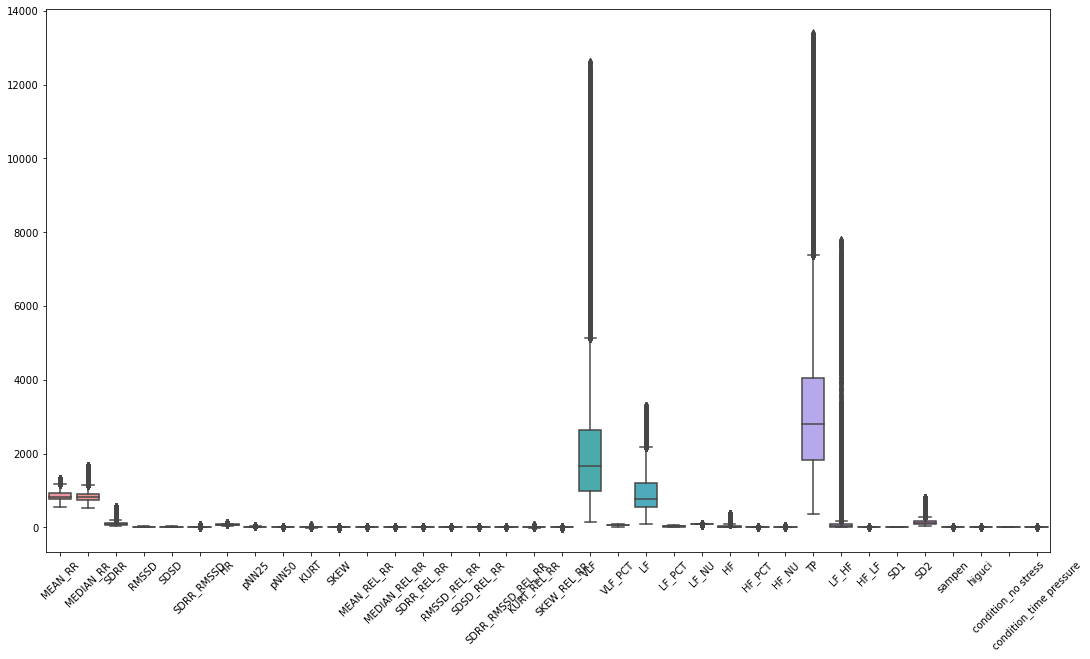

In [71]:


# to see if any outliers:
# Plot beofore outlier treatment
plt.subplots(figsize=(18, 10))
ax = sns.boxplot(data=train_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [72]:
#Outlier Treatment:

# Below code can be used to remove all outlier rows
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_df))

train_df_out = train_df[(z < 3).all(axis=1)]


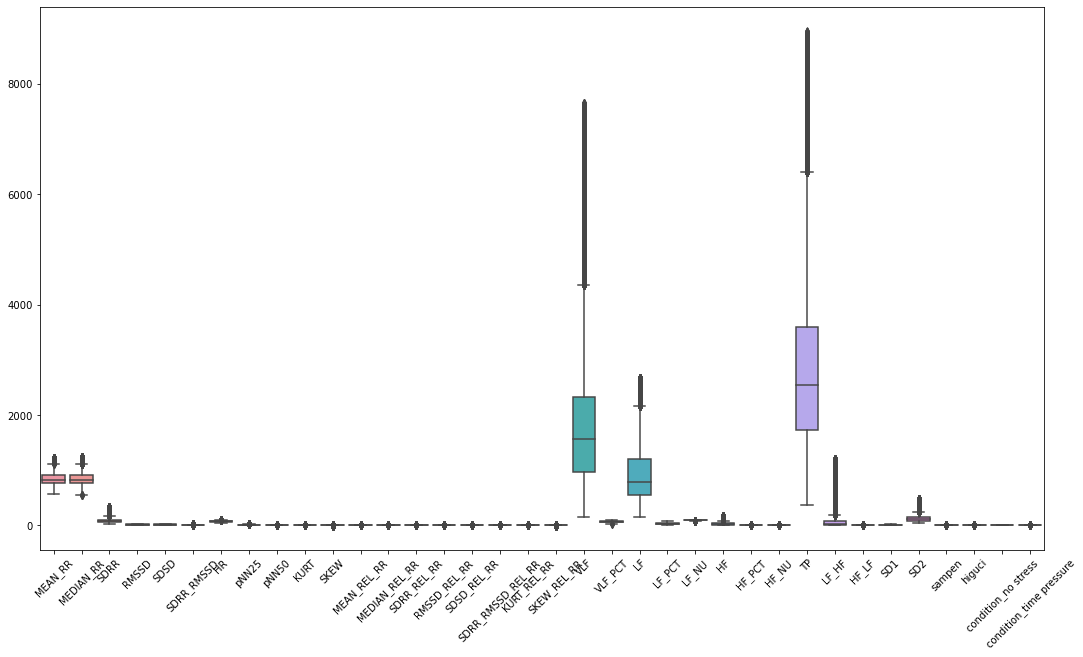

In [73]:

# to see if any outliers:
# Plot after outlier treatment
plt.subplots(figsize=(18, 10))
ax = sns.boxplot(data=train_df_out)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Raw and Outlier treated data

In [75]:
print (train_df.shape)
print (train_df_out.shape)

(369289, 36)
(301799, 36)


# Preparing dataset for multiple iterations of model building

In [76]:

raw_df = train_df
out_df = train_df_out

raw_no_col_df=raw_df.drop(to_drop_colinear,axis=1)
out_no_col_df=out_df.drop(to_drop_colinear,axis=1)

raw_no_col_no_weak_df=raw_no_col_df.drop(to_drop_weak_predictors,axis=1)
out_no_col_no_weak_df=out_no_col_df.drop(to_drop_weak_predictors,axis=1)

print (raw_df.shape)
print (out_df.shape)
print ("")
print (raw_no_col_df.shape)
print (out_no_col_df.shape)
print ("")
print (raw_no_col_no_weak_df.shape)
print (out_no_col_no_weak_df.shape)
print ("")

(369289, 36)
(301799, 36)

(369289, 30)
(301799, 30)

(369289, 28)
(301799, 28)



# Model Building

In [82]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

def model_build_add_scores(in_desc, in_df):
    


    y = in_df [['HR']]
    X=in_df.drop('HR',axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
    #simple_model_building_and_append_scores(in_desc,X_train,y_train,X_test,y_test,X,y )
    one_model_building_and_append_scores(in_desc,X_train,y_train,X_test,y_test,X,y )

In [110]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingRegressor
import xgboost


In [111]:

# Function to append scores to series
def append_scores(m,r,a,b,c,d,in_X,in_y):
    X=in_X
    y=in_y
    X_train=a
    y_train=b
    X_test=c
    y_test=d
    reg=r
    model_name=m

    training_score = reg.score(X_train, y_train)
    testing_score=reg.score(X_test, y_test)

    
    

    cross_vals = cross_val_score(reg, X, y, cv=5)
    mean=cross_vals.mean()
    std=cross_vals.std()
    start_interval = round((mean-(1.96*std)),2)
    end_interval = round((mean+(1.96*std)),2)
    confidence_interval=    str(start_interval) + ' to ' + str(end_interval)
    
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, reg.predict(X_test))
    

    

    Model.append(model_name)
    Training_Score.append(training_score)
    Testing_Score.append(testing_score)
    K_Fold_Mean.append(mean)
    K_Fold_Std.append(std)
    Conidence_Interval_95.append(confidence_interval)
    my_mae.append(mae)

    

In [112]:
# Function to build different models for the different input data (iterations)
def one_model_building_and_append_scores (i,a,b,c,d,in_X,in_y):

    X=in_X
    y=np.ravel(in_y)
    iteration=i
    X_train=a
    y_train=np.ravel(b)
    X_test=c
    y_test=np.ravel(d)


    model = LinearRegression()
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("Linear Regression",reg,X_train,y_train,X_test,y_test,X,y)
    
    
    model = GradientBoostingRegressor(random_state=0, n_estimators=100)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("GradientBoostingRegressor",reg,X_train,y_train,X_test,y_test,X,y)


    


In [113]:
# Function to build different models for the different input data (iterations)
def simple_model_building_and_append_scores (i,a,b,c,d,in_X,in_y):

    X=in_X
    y=np.ravel(in_y)
    iteration=i
    X_train=a
    y_train=np.ravel(b)
    X_test=c
    y_test=np.ravel(d)


    model = LinearRegression()
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("Linear Regression",reg,X_train,y_train,X_test,y_test,X,y)
    
    model = RandomForestRegressor(max_depth=2)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("RandomForestRegressor",reg,X_train,y_train,X_test,y_test,X,y)

    
    model = GradientBoostingRegressor(random_state=0, n_estimators=100)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("GradientBoostingRegressor",reg,X_train,y_train,X_test,y_test,X,y)
    
    model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("XGBRegressor",reg,X_train,y_train,X_test,y_test,X,y)
    



In [128]:
# Initialize variables:
Iteration=[]
Model=[]
Training_Score=[]
Testing_Score=[]
K_Fold_Mean=[]
K_Fold_Std=[]
Conidence_Interval_95=[]
my_mae =[]
Score_Table={}



# Testing with sample

In [127]:
sample_df = out_df.sample(frac=0.01, replace=True)
print (sample_df.shape)

(3018, 36)


In [129]:
model_build_add_scores('outlier_treated_data',sample_df)

# Model Building via function

In [88]:

model_build_add_scores('outlier_treated_data',out_df)
model_build_add_scores('outlier_treated_data - no weak',out_no_col_df)
model_build_add_scores('outlier_treated_data - no weak',out_no_col_no_weak_df)

In [39]:
#model_build_add_scores('raw_data',raw_df)

In [40]:
#model_build_add_scores('raw_data',raw_df)
model_build_add_scores('outlier_treated_data',out_df)
#model_build_add_scores('raw_data - no colinear',raw_no_col_df)
model_build_add_scores('outlier_treated_data - no weak',out_no_col_df)
#model_build_add_scores('raw_data - no colinear',raw_no_col_no_weak_df)
model_build_add_scores('outlier_treated_data - no weak',out_no_col_no_weak_df)

In [ ]:
#simple_model_building_and_append_scores("out_treated_dropped_columns",X_train,y_train,X_test,y_test )

#model_building_and_append_scores("outlier_treated_data",X_train_out,y_train_out,X_test_out,y_test_out )
#model_building_and_append_scores("all_data_with_no_weak_predictors",X_train_no_wk,y_train_no_wk,X_test_no_wk,y_test_no_wk )
#model_building_and_append_scores("outlier_treated_data_with_no_weak_predictors",X_train_out_no_wk,y_train_out_no_wk,X_test_out_no_wk,y_test_out_no_wk )


# Recording scores and metrics in a dataframe

In [130]:
Score_Table = {
    "Iteration": Iteration,
    "Model": Model,
    "Training_Score": Training_Score,
    "Testing_Score": Testing_Score,
    "K_Fold_Mean": K_Fold_Mean,
    "K_Fold_Std": K_Fold_Std,
    "Conidence_Interval_95": Conidence_Interval_95,
    "my_mae": my_mae,
    }

Score_Table = pd.DataFrame(Score_Table)

In [131]:
Score_Table

,Iteration,Model,Training_Score,Testing_Score,K_Fold_Mean,K_Fold_Std,Conidence_Interval_95,my_mae
0,outlier_treated_data,Linear Regression,0.989794,0.990181,0.989489,0.001382,0.99 to 0.99,0.568285
1,outlier_treated_data,GradientBoostingRegressor,0.998863,0.997557,0.997414,0.000747,1.0 to 1.0,0.303650


### Model Tuning


In [133]:
in_df=sample_df
y = in_df [['HR']]
X=in_df.drop('HR',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

#Hyperparameter tuning using RandomizedSearchCV

In [134]:
# First model --> GradientBoostingRegressor
# Perform hyper parameter tuning using RandomizedSearchCV



# Preparing the parameter grid for the RandomizedSearchCV

param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [135]:
# First model --> GradientBoostingRegressor
# Perform hyper parameter tuning using RandomizedSearchCV



# Preparing the parameter grid for the RandomizedSearchCV

param_grid = {
    'criterion': [ 'mae'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [136]:

from sklearn.model_selection import RandomizedSearchCV

rs_cv1 = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 5, n_iter=100)
rs_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 88.0min


KeyboardInterrupt: 

In [ ]:
# Initialize variables:
Iteration_hy=[]
Model_hy=[]
Training_Score_hy=[]
Testing_Score_hy=[]
K_Fold_Mean_hy=[]
K_Fold_Std_hy=[]
Conidence_Interval_95_hy=[]
Best_Param_hy = []
Score_Table_hy={}


### Adding the randomized search cv scores to a dataframe:


    

In [ ]:

mean1 = rs_cv1.best_score_
std1 = rs_cv1.cv_results_['mean_test_score'].std()

training_score1 = rs_cv1.cv_results_['mean_train_score'].mean()
test_score1 = rs_cv1.score(X_test, y_test)

conf1=str(round(mean1-(1.96*std1),3)) + ' to ' + str(round(mean1+(1.96*std1),3))
best_param1 = rs_cv1.best_params_
                                                     
      



In [ ]:

Iteration_hy.append("Hyper Parameter Tuning")
Model_hy.append("Gradient Boost Regressor")
Training_Score_hy.append(training_score1)
Testing_Score_hy.append(test_score1)
K_Fold_Mean_hy.append(mean1)
K_Fold_Std_hy.append(std1)
Conidence_Interval_95_hy.append(conf1)
Best_Param_hy.append(best_param1)

In [ ]:
Iteration_hy.append("Hyper Parameter Tuning")
Model_hy.append("BaggingRegressor")
Training_Score_hy.append(training_score2)
Testing_Score_hy.append(test_score2)
K_Fold_Mean_hy.append(mean2)
K_Fold_Std_hy.append(std2)
Conidence_Interval_95_hy.append(conf2)
Best_Param_hy.append(best_param2)


In [ ]:
Score_Table_hy = {
    "Iteration": Iteration_hy,
    "Model": Model_hy,
    "Training_Score": Training_Score_hy,
    "Testing_Score": Testing_Score_hy,
    "K_Fold_Mean": K_Fold_Mean_hy,
    "K_Fold_Std": K_Fold_Std_hy,
    "Conidence_Interval_95": Conidence_Interval_95_hy,
    "Best_Param": Best_Param_hy,
    
    }

Score_Table_hy = pd.DataFrame(Score_Table_hy)

In [ ]:
Score_Table_hy

# CONCLUSION



In [ ]:
Score_Table_hy.iloc[0]

In [ ]:
Score_Table_hy['Best_Param'][0]

In [ ]:

# Function to build different models for the different input data (iterations)
def model_building_and_append_scores (i,a,b,c,d):

    iteration=i
    X_train=a
    y_train=b
    X_test=c
    y_test=d


    model = LinearRegression()
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("Linear Regression",reg,X_train,y_train,X_test,y_test)


    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    reg = LinearRegression().fit(X_train2, y_train)
    Iteration.append(iteration)
    append_scores("Linear Regression with poly 2 degree",reg,X_train2,y_train,X_test2,y_test)


    poly = PolynomialFeatures(degree=3, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    reg = LinearRegression().fit(X_train2, y_train)
    Iteration.append(iteration)
    append_scores("Linear Regression with poly 3 degree",reg,X_train2,y_train,X_test2,y_test)


    model = Ridge()
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("Ridge Regression",reg,X_train,y_train,X_test,y_test)


    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    reg = Ridge().fit(X_train2, y_train)
    Iteration.append(iteration)
    append_scores("Ridge Regression with poly 2 degree",reg,X_train2,y_train,X_test2,y_test)


    poly = PolynomialFeatures(degree=3, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    reg = Ridge().fit(X_train2, y_train)
    Iteration.append(iteration)
    append_scores("Ridge Regression with poly 3 degree",reg,X_train2,y_train,X_test2,y_test)


    model = Lasso()
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("Lasso Regression",reg,X_train,y_train,X_test,y_test)


    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    reg = Lasso(alpha=1.0).fit(X_train2, y_train)
    Iteration.append(iteration)
    append_scores("Lasso Regression with poly 2 degree",reg,X_train2,y_train,X_test2,y_test)


    poly = PolynomialFeatures(degree=3, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    reg = Lasso(alpha=1.0).fit(X_train2, y_train)
    Iteration.append(iteration)
    append_scores("Lasso Regression with poly 3 degree",reg,X_train2,y_train,X_test2,y_test)


    model = RandomForestRegressor(max_depth=2)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("RandomForestRegressor",reg,X_train,y_train,X_test,y_test)
    
    model = DecisionTreeRegressor(max_depth=2)
    reg = model.fit(X_train, y_train)
    dTree= model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("DecisionTreeRegressor",reg,X_train,y_train,X_test,y_test)

    
    model = BaggingRegressor( n_estimators=50,random_state=1)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("Bagging Regressor",reg,X_train,y_train,X_test,y_test)
    


    model = AdaBoostRegressor(random_state=0, n_estimators=100)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("AdaBoostRegressor",reg,X_train,y_train,X_test,y_test)


    model = GradientBoostingRegressor(random_state=0, n_estimators=100)
    reg = model.fit(X_train, y_train)
    Iteration.append(iteration)
    append_scores("GradientBoostingRegressor",reg,X_train,y_train,X_test,y_test)